In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import os

In [109]:
path = './wandb_csv'
csv_name = 'Pooled_test.csv'
df = pd.read_csv(os.path.join(path, csv_name))
for i in df.columns[1:]:
    df[i] = df[i].astype(float)
original_df = df.set_index('pred_target')
original_df

,seed,SAND,SAND.1,Rajikomar,Rajikomar.1,DescEmb,DescEmb.1,UniHPF,UniHPF.1,SAND.2,...,UniHPF.2,UniHPF.3,SAND.4,SAND.5,Rajikomar.4,Rajikomar.5,DescEmb.4,DescEmb.5,UniHPF.4,UniHPF.5
pred_target,,,,,,,,,,,,,,,,,,,,,
mortality,2020.0,0.866000,0.820212,0.929000,0.938372,0.918000,0.933858,0.936000,0.971138,0.868000,...,0.907000,0.962213,0.868000,0.908889,0.913509,0.945050,0.899533,0.940523,0.907000,0.894151
mortality,2021.0,0.870607,0.819595,0.930458,0.971230,0.919632,0.919205,0.947745,0.964341,0.940745,...,0.947465,0.928648,0.940745,0.931299,1.003581,1.043045,0.936098,0.960239,0.947465,1.004588
mortality,2022.0,0.883972,0.891551,0.935790,0.956609,0.974108,1.032783,0.950040,0.983052,0.972170,...,0.954719,1.028621,0.972170,0.991173,1.061202,1.101664,0.945145,1.018636,0.954719,0.995067
mortality,2023.0,0.884896,0.897847,0.964860,0.976441,0.983652,1.033208,0.951261,0.988754,0.979737,...,0.957428,1.001057,0.979737,1.017161,1.097927,1.169699,0.947119,1.007397,0.957428,1.016378
mortality,2024.0,0.891418,0.853018,0.987854,0.985152,0.988480,0.975594,1.012416,1.070328,1.024865,...,0.960722,0.997507,1.024865,1.089392,1.106550,1.119155,1.001039,1.002152,0.960722,0.994913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Avg,2021.0,0.806761,0.779631,0.836311,0.826005,0.826358,0.844548,0.841100,0.862587,0.896428,...,0.890795,0.911354,0.893266,0.920311,0.908771,0.927204,0.882729,0.906539,0.887693,0.917899
Avg,2022.0,0.826754,0.800611,0.854942,0.849658,0.847554,0.867613,0.852178,0.870234,0.910821,...,0.910499,0.946410,0.910707,0.942962,0.930829,0.956281,0.895875,0.922053,0.911358,0.922296
Avg,2023.0,0.852430,0.820920,0.874606,0.874720,0.870762,0.886613,0.858222,0.883889,0.881119,...,0.900660,0.922001,0.886971,0.913036,0.910762,0.941441,0.878638,0.906103,0.898657,0.931873


In [110]:
col_rename_dict ={'diagnosis':'Dx', 'los_3day':'Los3', 'los_7day':'Los7', 'final_acuity':'Fi_ac', 
                  'imminent_discharge':'Im_disch', 'mortality':'Mort', 'readmission':'Readm',
                    'long_term_mortality':'LMort', 'creatinine':'Crt', 'bilirubin':'Blr',
                   'platelets':'Plt', 'wbc':'Wbc'}
df = df.rename(col_rename_dict)
original_df = original_df.rename(col_rename_dict)

In [111]:
df

,pred_target,seed,SAND,SAND.1,Rajikomar,Rajikomar.1,DescEmb,DescEmb.1,UniHPF,UniHPF.1,...,UniHPF.2,UniHPF.3,SAND.4,SAND.5,Rajikomar.4,Rajikomar.5,DescEmb.4,DescEmb.5,UniHPF.4,UniHPF.5
0,mortality,2020.0,0.866000,0.820212,0.929000,0.938372,0.918000,0.933858,0.936000,0.971138,...,0.907000,0.962213,0.868000,0.908889,0.913509,0.945050,0.899533,0.940523,0.907000,0.894151
1,mortality,2021.0,0.870607,0.819595,0.930458,0.971230,0.919632,0.919205,0.947745,0.964341,...,0.947465,0.928648,0.940745,0.931299,1.003581,1.043045,0.936098,0.960239,0.947465,1.004588
2,mortality,2022.0,0.883972,0.891551,0.935790,0.956609,0.974108,1.032783,0.950040,0.983052,...,0.954719,1.028621,0.972170,0.991173,1.061202,1.101664,0.945145,1.018636,0.954719,0.995067
3,mortality,2023.0,0.884896,0.897847,0.964860,0.976441,0.983652,1.033208,0.951261,0.988754,...,0.957428,1.001057,0.979737,1.017161,1.097927,1.169699,0.947119,1.007397,0.957428,1.016378
4,mortality,2024.0,0.891418,0.853018,0.987854,0.985152,0.988480,0.975594,1.012416,1.070328,...,0.960722,0.997507,1.024865,1.089392,1.106550,1.119155,1.001039,1.002152,0.960722,0.994913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Avg,2021.0,0.806761,0.779631,0.836311,0.826005,0.826358,0.844548,0.841100,0.862587,...,0.890795,0.911354,0.893266,0.920311,0.908771,0.927204,0.882729,0.906539,0.887693,0.917899
62,Avg,2022.0,0.826754,0.800611,0.854942,0.849658,0.847554,0.867613,0.852178,0.870234,...,0.910499,0.946410,0.910707,0.942962,0.930829,0.956281,0.895875,0.922053,0.911358,0.922296
63,Avg,2023.0,0.852430,0.820920,0.874606,0.874720,0.870762,0.886613,0.858222,0.883889,...,0.900660,0.922001,0.886971,0.913036,0.910762,0.941441,0.878638,0.906103,0.898657,0.931873
64,Avg,2024.0,0.871348,0.837987,0.893553,0.880642,0.889109,0.907873,0.884833,0.900549,...,0.901243,0.926456,0.897790,0.917639,0.904250,0.922234,0.885269,0.893331,0.893560,0.920818


In [112]:
df = df.groupby('pred_target').agg(lambda x: x.mean(axis=0))
df.index = ['Avg', 'Dx', 'Los3', 'Los7', 'Mort', 'Readm', 'LMort', 'Fi_ac', 'Im_disch', 'Crt', 'Blr', 'Plt','Wbc']
df = df.reindex(index=['Avg','Mort', 'Readm', 'Los3', 'Los7', 'Dx', 'LMort', 'Fi_ac', 'Im_disch', 'Crt', 'Blr', 'Plt','Wbc'])

In [113]:
#df = df.drop(index='Avg')
df = df.drop(index='LMort')

In [114]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [115]:
df

,seed,SAND,SAND.1,Rajikomar,Rajikomar.1,DescEmb,DescEmb.1,UniHPF,UniHPF.1,SAND.2,...,UniHPF.2,UniHPF.3,SAND.4,SAND.5,Rajikomar.4,Rajikomar.5,DescEmb.4,DescEmb.5,UniHPF.4,UniHPF.5
Avg,2022.0,0.828275,0.799717,0.857233,0.850776,0.849990,0.869857,0.852517,0.873999,0.888771,...,0.893395,0.919508,0.890694,0.914489,0.907080,0.929494,0.880710,0.901055,0.890695,0.916690
Mort,2022.0,0.775331,0.742636,0.805939,0.797841,0.760031,0.779212,0.803378,0.817469,0.869199,...,0.912829,0.925753,0.869199,0.881783,0.852419,0.864222,0.846850,0.858289,0.912829,0.945341
Readm,2022.0,0.951805,0.925069,0.878762,0.855782,0.857227,0.897561,0.845523,0.856369,0.801083,...,0.821219,0.845999,0.801083,0.806603,0.853596,0.874877,0.809718,0.820584,0.821219,0.838347
Los3,2022.0,0.915003,0.885234,0.942655,0.928803,0.945011,0.951682,0.944541,0.972444,0.884637,...,0.894097,0.895913,0.884637,0.905619,0.897615,0.912759,0.876380,0.896106,0.894097,0.912897
Los7,2022.0,0.770539,0.752091,0.745903,0.726628,0.763775,0.786830,0.721858,0.730942,0.966083,...,0.924385,0.971386,0.966083,0.984555,0.950844,0.951247,0.927836,0.971440,0.924385,0.952567
Dx,2022.0,0.906797,0.869568,0.884174,0.884910,0.875569,0.917155,0.900329,0.924164,0.906974,...,0.919599,0.944228,0.906974,0.950691,0.939637,0.955197,0.912300,0.956521,0.919599,0.938486
Fi_ac,2022.0,0.756707,0.739158,0.818452,0.817096,0.824059,0.842430,0.827012,0.840698,0.855383,...,0.883232,0.897800,0.855383,0.891983,0.853504,0.872517,0.849555,0.870368,0.883232,0.907462
Im_disch,2022.0,0.742661,0.709149,0.836866,0.824079,0.854863,0.894525,0.842558,0.863817,0.816605,...,0.774437,0.795216,0.816605,0.835763,0.851874,0.874476,0.830546,0.848188,0.774437,0.808443
Crt,2022.0,0.879379,0.856445,0.949592,0.965561,0.956775,0.978930,0.959492,0.995522,0.957103,...,0.945467,0.983609,0.957103,0.987583,1.036554,1.075723,0.945787,0.985789,0.945467,0.981020
Blr,2022.0,0.961038,0.926356,0.975738,0.969848,0.942871,0.954156,0.950293,0.999510,0.988581,...,1.034037,1.074616,1.014459,1.037048,0.994120,1.033729,0.995914,0.983116,0.993199,0.984507


In [116]:
df.loc['Mort'].values

array([2.02200000e+03, 7.75330677e-01, 7.42635999e-01, 8.05939194e-01,
       7.97840867e-01, 7.60030968e-01, 7.79211667e-01, 8.03378220e-01,
       8.17468732e-01, 8.69199057e-01, 8.53832369e-01, 8.52418509e-01,
       8.34354018e-01, 8.46849621e-01, 8.61302734e-01, 9.12829241e-01,
       9.25752512e-01, 8.69199057e-01, 8.81782666e-01, 8.52418509e-01,
       8.64222456e-01, 8.46849621e-01, 8.58288581e-01, 9.12829241e-01,
       9.45341449e-01])

In [117]:
original_df.index[:]

Index([    'Mort',     'Mort',     'Mort',     'Mort',     'Mort',     'Los3',
           'Los3',     'Los3',     'Los3',     'Los3',     'Los7',     'Los7',
           'Los7',     'Los7',     'Los7',    'Readm',    'Readm',    'Readm',
          'Readm',    'Readm',    'Fi_ac',    'Fi_ac',    'Fi_ac',    'Fi_ac',
          'Fi_ac', 'Im_disch', 'Im_disch', 'Im_disch', 'Im_disch', 'Im_disch',
             'Dx',       'Dx',       'Dx',       'Dx',       'Dx',      'Crt',
            'Crt',      'Crt',      'Crt',      'Crt',      'Blr',      'Blr',
            'Blr',      'Blr',      'Blr',      'Wbc',      'Wbc',      'Wbc',
            'Wbc',      'Wbc',    'LMort',    'LMort',    'LMort',    'LMort',
          'LMort',      'Plt',      'Plt',      'Plt',      'Plt',      'Plt',
            'Avg',      'Avg',      'Avg',      'Avg',      'Avg',        nan],
      dtype='object', name='pred_target')

In [118]:
df.drop(columns='seed').loc['Avg'].values[8:16]

array([0.88877097, 0.86850521, 0.9067913 , 0.89780945, 0.88244979,
       0.89281351, 0.89339538, 0.91950838])

Avg
scatter 0
scatter 1
scatter 2
scatter 3
[[0.88877097 0.86850521 0.9067913  0.89780945]
 [0.88244979 0.89281351 0.89339538 0.91950838]]
plot
Mort
scatter 0
scatter 1
scatter 2
scatter 3
[[0.86919906 0.85383237 0.85241851 0.83435402]
 [0.84684962 0.86130273 0.91282924 0.92575251]]
plot
Readm
scatter 0
scatter 1
scatter 2
scatter 3
[[0.80108265 0.78658842 0.85359582 0.8560073 ]
 [0.80971798 0.81991498 0.82121867 0.8459992 ]]
plot
Los3
scatter 0
scatter 1
scatter 2
scatter 3
[[0.88463734 0.88796153 0.89761528 0.90179823]
 [0.87637978 0.88523571 0.89409729 0.89591346]]
plot
Los7
scatter 0
scatter 1
scatter 2
scatter 3
[[0.96608326 0.96011981 0.95084351 0.93478412]
 [0.92783614 0.92302228 0.92438539 0.97138625]]
plot
Dx
scatter 0
scatter 1
scatter 2
scatter 3
[[0.90697425 0.89334046 0.93963721 0.91150816]
 [0.9122997  0.91405446 0.91959909 0.94422763]]
plot
Fi_ac
scatter 0
scatter 1
scatter 2
scatter 3
[[0.85538334 0.82118014 0.85350387 0.83546572]
 [0.84955497 0.85895212 0.88323189 0.89

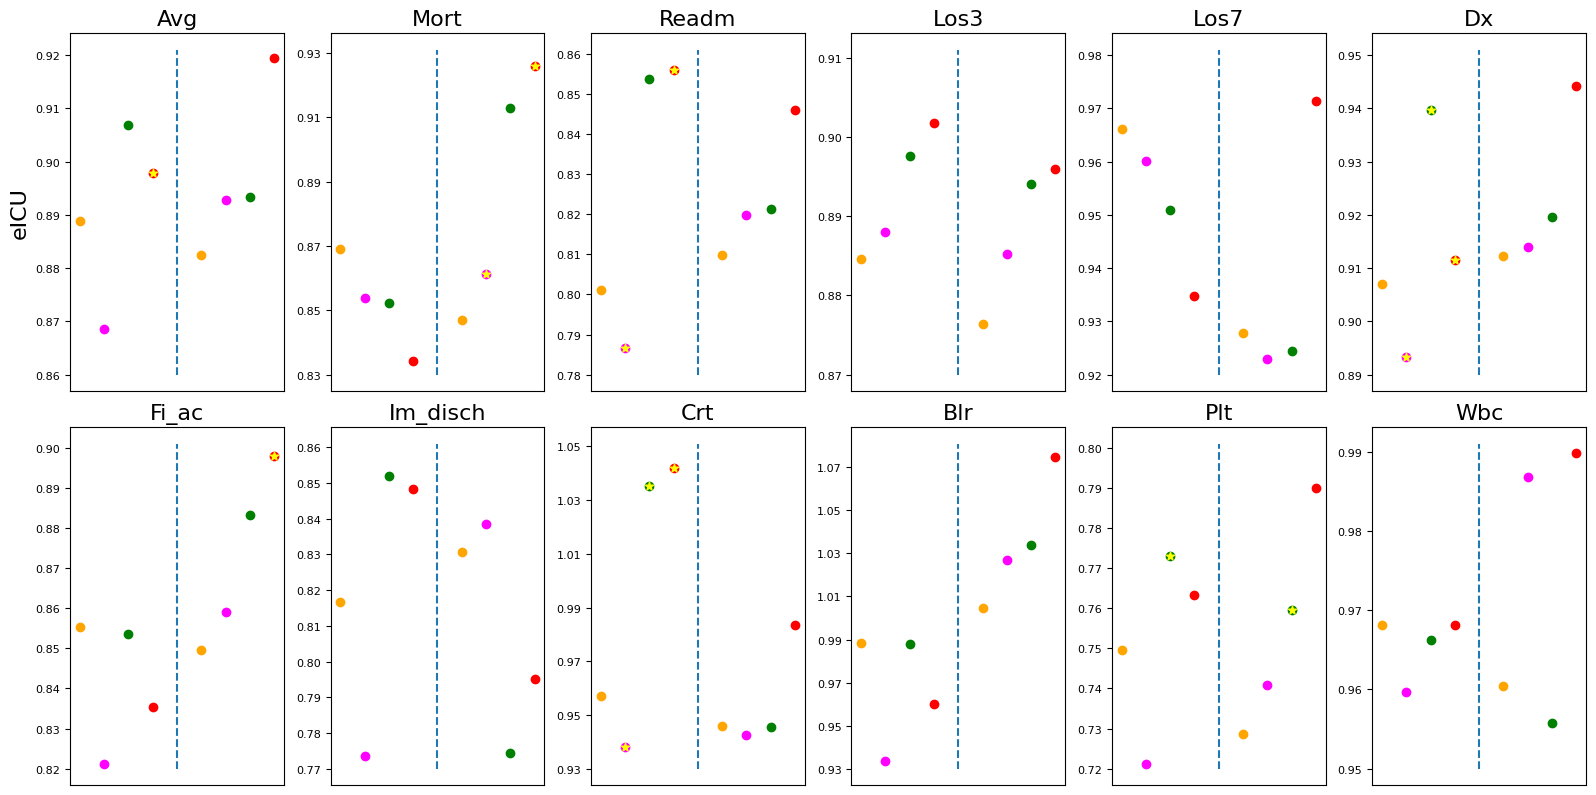

In [119]:
plt.figure(figsize=(16, 8))
grid = np.mgrid[0:2, 0:4][0]
datasets = ['MIMIC-III', 'eICU', 'MIMIC-IV']
for dataset in range(1,2): #dataset:
    for i, task in enumerate(df.index):
        print(task)
    
        plt.subplot(2,6, 0*5+i+1)
        
        data = df.drop(columns='seed').loc[task].values[dataset*8:dataset*8+8].reshape(2,4)
        data = data[[0,1],:] #모델 순서 바꾸기
        if dataset==0:
            #MIMIC3: 3-e, 3-4
            colors = ['orange','magenta','blue', 'red']
        elif dataset==1:
            #eICU: 3-e, 4-e
            colors = ['orange', 'magenta', 'green', 'red']
        elif dataset==2:
            #MIMIC4: 3-4, 4-e
            colors = ['orange', 'blue', 'green', 'red']

        for j in range(4):
            print(f'scatter {j}')
            color = colors[j]
            plt.scatter(grid[:,j]+0.2*j-0.3, data[:,j], color=color)
            # datasets[dataset], model: j, task: i, : : combination
            original = original_df.loc[task].values[:, dataset*8:dataset*8+8].reshape(5,2,4)[:,[0,1],:] # axis: seed,model, combination
            for k in range(2):
                if j!=0 and ttest_ind(original[:,k,0], original[:,k,j])[1]<0.05:
                    plt.scatter(grid[k,j]+0.2*j-0.3, data[k,j], color='yellow', marker='*')
                plt.scatter
        # for j in [0]:
        #     colors = ['orange', "", "", 'red']
        #     for k in range(2):
        #         plt.plot([k-0.3+0.2*j, k+0.3], [data[k,j], data[k,j]], '--',color=colors[j])
        # for j in range(2):
        #     plt.arrow(j+0.3, data[j,0], 0, data[j,1]-data[j,0], length_includes_head=True, head_width=0.15, head_length=0.0015, color='black')
        
        # plt.plot(grid[:,3], data[:,3], color=colors[3], alpha=0.3)
        # plt.plot(grid[:,0], data[:,0], color=markers[0], alpha=0.3)
        # plt.arrow(3, data[3,0], 0, data[3,3]-data[3,0], length_includes_head=True, head_width=0.15, head_length=0.0015, color='black')
        print(data)
        data_min = data.min() *100//1/100
        data_max = data.max() *100//1/100+0.011
        plt.plot([0.5, 0.5], [data_min, data_max], '--')
        print('plot')
        ticks = np.arange(data_min, data_max, 0.01)
        if data_max - data_min > 0.1:
            ticks = np.arange(data_min, data_max, 0.02)
        plt.yticks(ticks)
        if dataset==2:
             plt.xticks(np.arange(2), labels=['A','B'])
        else:
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
        if dataset:
            plt.title(task)
        if i==0:
            plt.ylabel(datasets[dataset])
print('plt finish')
plt.tight_layout()

# plt.savefig('vldb_pooled.pdf',format='pdf')

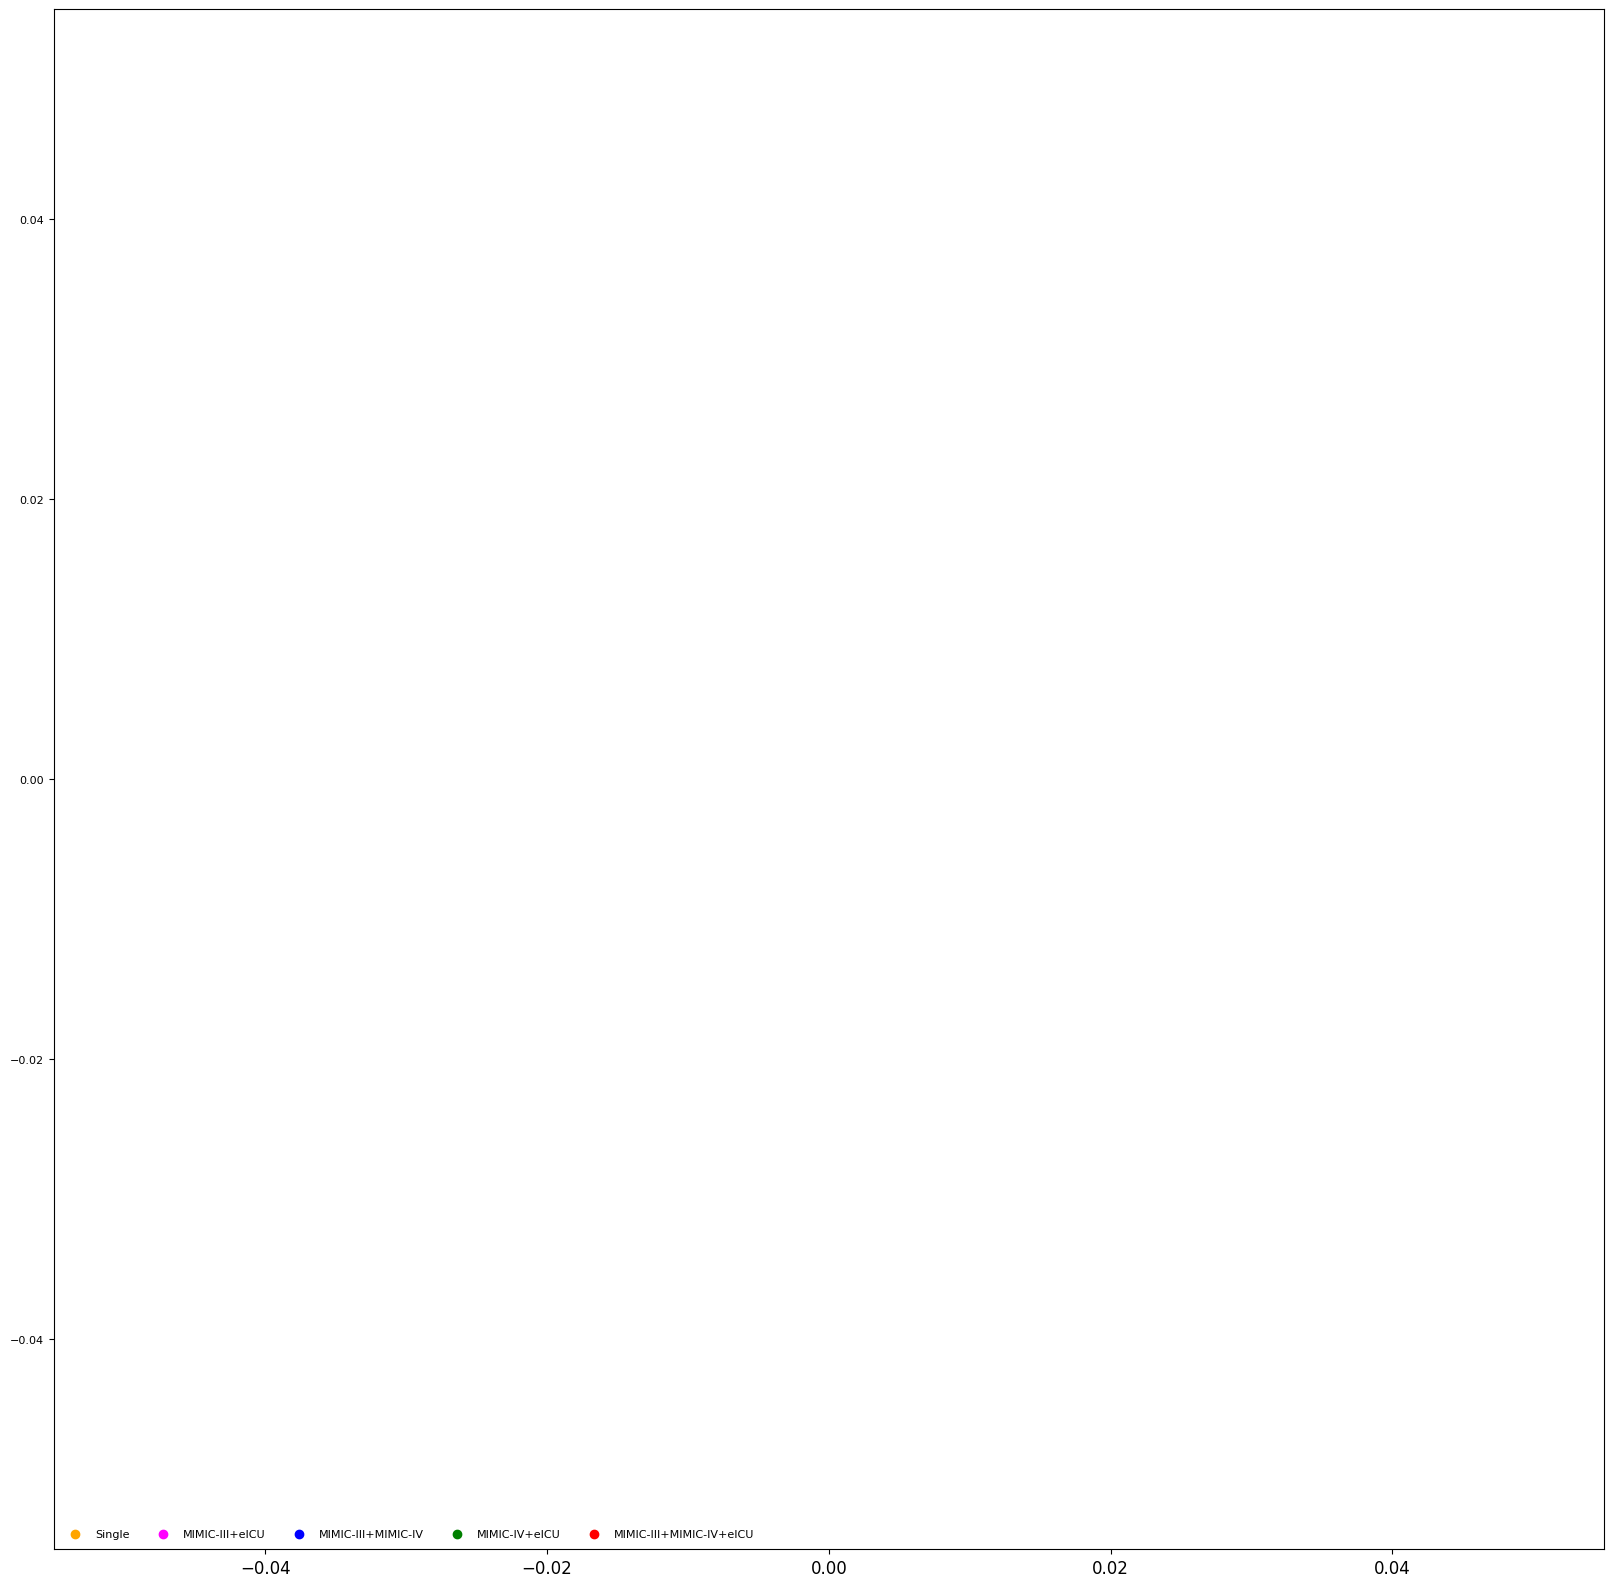

In [68]:
plt.figure(figsize=(20, 20))

for i in ['orange','magenta','blue', 'green', 'red']:
    plt.scatter([], [], color=i)

legend = plt.legend(labels=['Single', 'MIMIC-III+eICU', 'MIMIC-III+MIMIC-IV', 'MIMIC-IV+eICU', 'MIMIC-III+MIMIC-IV+eICU'], ncol=5, loc=3, framealpha=1, frameon=False)

fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('vldb_pooled_legend.pdf', format='pdf', bbox_inches=bbox)
plt.show()

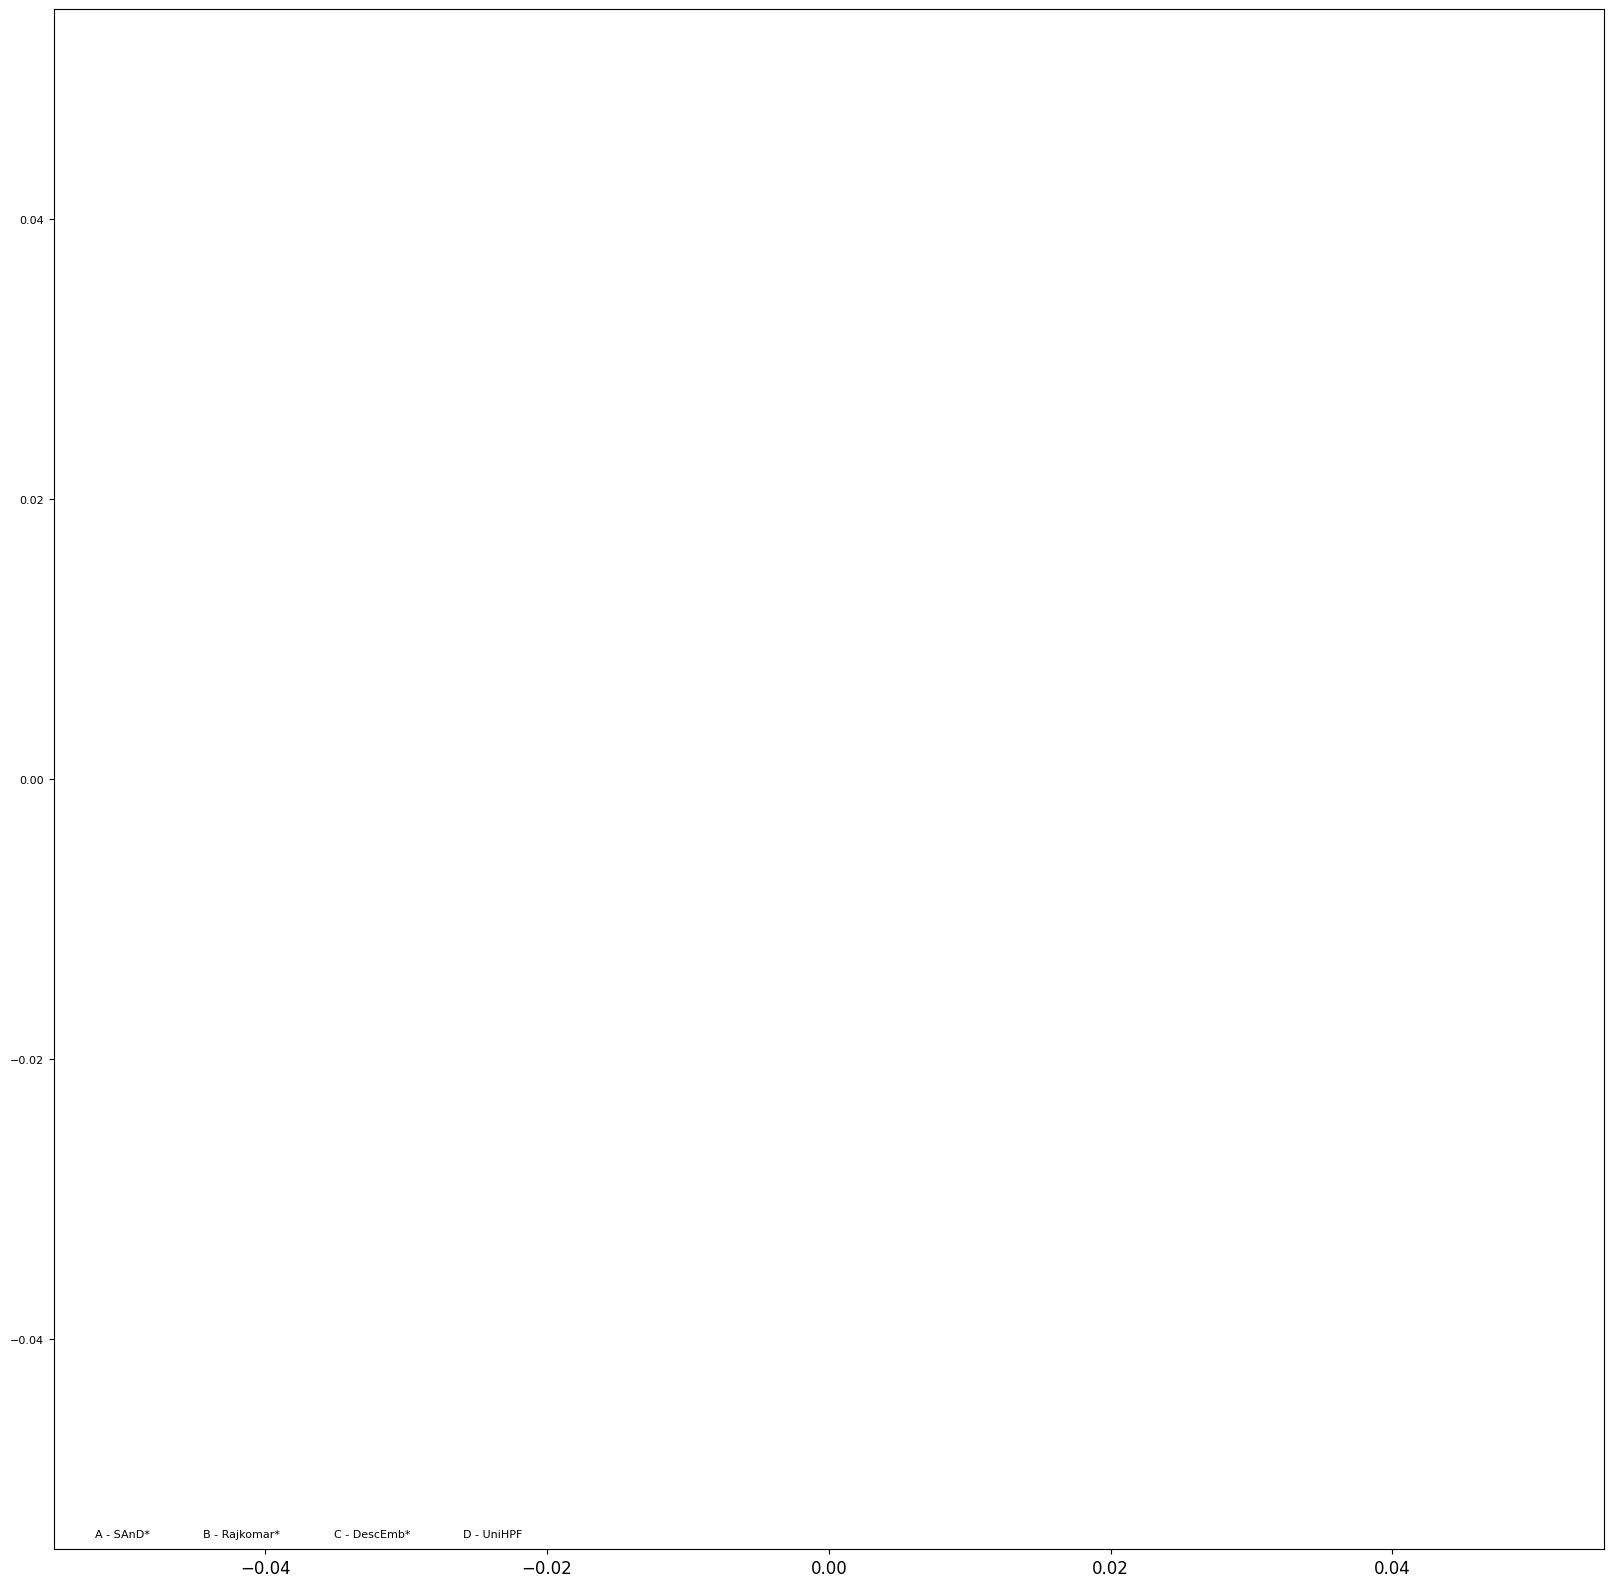

In [45]:
plt.figure(figsize=(20, 20))

for i in ['white', 'white', 'white', 'white']:
    plt.scatter([], [], marker='|', color=i)

legend = plt.legend(labels=['A - SAnD*', 'B - Rajkomar*', 'C - DescEmb*', "D - UniHPF"], ncol=5, loc=3, framealpha=1, frameon=False)

fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('vldb_pooled_model_legend.pdf', format='pdf', bbox_inches=bbox)
plt.show()